In [1]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
columns = ['Rep','Water','Nrate']
columns.extend([int(round(x*304.8)) for x in [6,5,4,3,2,1]])

In [3]:
number_of_sheets = 10
sheets = []
neutron_data = []
dates = []
for i in range(number_of_sheets):
    sheets.append(pd.read_excel('../Data/Neutron probe/NxWater 2021.xlsx', sheet_name=i, engine='openpyxl', header = None))
    dates.append(sheets[i].iloc[[2],[1]].values[0][0])
    neutron_data.append(pd.DataFrame(sheets[i].iloc[list(range(14,50)),list(range(9))]))
    neutron_data[i].columns = ['Rep','Water','Nrate',6,5,4,3,2,1]
    neutron_data[i][6] = neutron_data[i][6].astype('float64')
    neutron_data[i][4] = neutron_data[i][4].astype('float64')
    neutron_data[i][3] = neutron_data[i][3].astype('float64')
    standard_count = sheets[i].iloc[[4],[8]].values[0][0]
    
    if i == 0:
        cal_slope = sheets[0].iloc[[1],[8]].values[0][0]
        cal_intercept = sheets[0].iloc[[2],[8]].values[0][0]
    neutron_data[i][[6,5,4,3,2,1]] = (neutron_data[i][[6,5,4,3,2,1]] / standard_count * cal_slope + cal_intercept) * 1.321 * 100
    neutron_data[i].columns = columns

print(dates[0])
print(cal_slope)
print(cal_intercept)
print(standard_count)

2021-06-14 00:00:00
0.147871
-0.0635
6397.0


In [4]:
neutron_data[0]

,Rep,Water,Nrate,1829,1524,1219,914,610,305
14,1,1,1,26.378067,26.798006,25.525064,20.557965,30.843207,20.981185
15,2,1,1,23.422085,25.114967,27.345897,26.351820,30.502006,23.123534
16,3,1,1,29.665407,24.032310,27.723186,29.091271,30.101751,23.258046
17,1,1,2,27.155611,24.232437,25.249479,22.073684,31.168004,23.133376
18,2,1,2,26.558510,25.479133,25.088721,30.380617,28.969882,22.382078
19,3,1,2,29.626038,26.611002,25.967969,25.282286,29.790077,19.222687
20,1,1,3,21.958857,25.331498,24.416161,25.098563,32.316277,22.375516
21,2,1,3,26.863622,26.765199,26.479771,27.050626,30.725099,23.185869
22,3,1,3,26.968607,24.914839,26.345259,25.915477,28.904267,21.220682
23,1,1,4,28.257953,26.617564,25.397114,30.026293,30.144401,21.220682


In [5]:
dates

[datetime.datetime(2021, 6, 14, 0, 0),
 datetime.datetime(2021, 6, 22, 0, 0),
 datetime.datetime(2021, 6, 28, 0, 0),
 datetime.datetime(2021, 7, 6, 0, 0),
 datetime.datetime(2021, 7, 12, 0, 0),
 datetime.datetime(2021, 7, 21, 0, 0),
 datetime.datetime(2021, 8, 3, 0, 0),
 datetime.datetime(2021, 8, 10, 0, 0),
 datetime.datetime(2021, 8, 17, 0, 0),
 datetime.datetime(2021, 9, 30, 0, 0)]

In [6]:
neutron_data[0].head()

,Rep,Water,Nrate,1829,1524,1219,914,610,305
14,1,1,1,26.378067,26.798006,25.525064,20.557965,30.843207,20.981185
15,2,1,1,23.422085,25.114967,27.345897,26.351820,30.502006,23.123534
16,3,1,1,29.665407,24.032310,27.723186,29.091271,30.101751,23.258046
17,1,1,2,27.155611,24.232437,25.249479,22.073684,31.168004,23.133376
18,2,1,2,26.558510,25.479133,25.088721,30.380617,28.969882,22.382078


In [7]:
tmp_df = neutron_data[0].melt(id_vars = ['Rep','Water','Nrate'])
water_df = pd.DataFrame(data = {'Rep': tmp_df['Rep'], 'Water': tmp_df['Water'],
                               'Nrate':tmp_df['Nrate'], 'Depth': tmp_df['variable']})
for i in range(len(dates)):
    tmp_df = neutron_data[i].melt(id_vars = ['Rep','Water','Nrate'])
    water_df[dates[i]] = tmp_df['value']
doy = [pd.to_datetime(x) for x in dates]
doy = [(x - datetime.datetime(2021, 1, 1)).days for x in doy]
columns = list(water_df.columns[:4])
columns.extend(doy)
water_df.columns = columns

In [8]:
water_df

,Rep,Water,Nrate,Depth,164,172,178,186,192,201,214,221,228,272
0,1,1,1,1829,26.378067,27.194303,25.883652,26.139819,25.822072,25.686354,24.606830,25.142568,24.188136,23.335305
1,2,1,1,1829,23.422085,24.013620,22.886043,23.734493,22.315084,22.997916,21.933532,22.099575,21.797981,20.559600
2,3,1,1,1829,29.665407,30.884160,29.121201,29.782547,28.370813,32.025057,29.267495,28.921130,28.552900,26.443851
3,1,1,2,1829,27.155611,27.395989,26.031560,27.105920,26.655187,27.008865,25.118217,24.257445,24.518754,24.743006
4,2,1,2,1829,26.558510,26.328047,26.324090,26.037254,25.594859,25.893414,24.704820,24.233028,23.724058,22.752071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,2,2,5,305,20.682634,22.658027,17.811144,12.687200,9.186106,8.827675,12.091628,13.483356,11.658019,11.081284
212,3,2,5,305,22.854510,25.170833,22.675685,21.593853,17.322977,14.718861,19.762433,19.636490,16.708284,14.788332
213,1,2,6,305,21.427371,22.036439,19.047000,17.875027,15.172683,12.691679,15.117080,17.490829,12.971391,10.177424
214,2,2,6,305,23.156342,26.228857,19.536741,17.918039,15.228663,14.421630,15.435548,17.396212,14.236232,13.081380


In [9]:
# Use this fo FC, would not get negative values
fc_max_df = pd.melt(water_df, id_vars=['Rep','Water','Nrate','Depth'], value_vars=[164, 172, 178, 186, 192, 201,
       214, 221, 228, 272]).groupby(['Rep','Water','Nrate','Depth']).max().reset_index()
fc_max_df.sort_values(['Rep','Water','Nrate','Depth'], inplace = True, ignore_index=True)
water_df.sort_values(['Rep','Water','Nrate','Depth'], inplace = True, ignore_index=True)
water_df['FC'] = fc_max_df['value']

In [10]:
fc_max_df

,Rep,Water,Nrate,Depth,variable,value
0,1,1,1,305,272,29.371862
1,1,1,1,610,272,30.843207
2,1,1,1,914,272,21.464445
3,1,1,1,1219,272,25.525064
4,1,1,1,1524,272,26.847139
...,...,...,...,...,...,...
211,3,2,6,610,272,32.732395
212,3,2,6,914,272,24.901716
213,3,2,6,1219,272,25.498159
214,3,2,6,1524,272,24.583481


In [11]:
water_df

,Rep,Water,Nrate,Depth,164,172,178,186,192,201,214,221,228,272,FC
0,1,1,1,305,20.981185,21.745482,18.156264,18.050381,23.174543,28.498360,27.344435,29.232449,29.371862,22.495571,29.371862
1,1,1,1,610,30.843207,30.616348,30.435941,28.432654,27.359878,29.293203,27.194387,28.875348,27.946262,27.179764,30.843207
2,1,1,1,914,20.557965,21.464445,19.806263,20.111616,20.181255,18.572846,18.448751,19.877610,19.492755,16.809802,21.464445
3,1,1,1,1219,25.525064,25.207203,24.292816,24.217544,23.918749,23.245052,22.349990,23.976647,23.441971,21.799354,25.525064
4,1,1,1,1524,26.798006,26.847139,24.930465,25.167101,25.127260,25.302291,23.280899,23.860665,23.757423,22.458928,26.847139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,3,2,6,610,31.345166,32.732395,31.750682,32.154788,31.235676,27.643404,21.648747,21.684483,19.377493,17.673966,32.732395
212,3,2,6,914,24.901716,24.459974,23.356063,23.221666,22.275569,21.110999,16.286839,15.448940,11.281903,9.404868,24.901716
213,3,2,6,1219,24.521146,25.498159,24.480166,24.270481,23.553232,23.158220,19.759371,19.364849,17.217860,11.875215,25.498159
214,3,2,6,1524,24.583481,24.208693,24.108752,23.717951,23.968143,23.492188,21.544632,21.135096,20.933521,17.970163,24.583481


In [12]:
pd.melt(water_df[(water_df['Rep'] == 1) & (water_df['Water'] == 1) & (water_df['Nrate'] == 1) & (water_df['Depth'] == 305)], id_vars=['Rep','Water','Nrate','Depth'], value_vars=[164, 172, 178, 186, 192, 201,
       214, 221, 228, 272]).groupby(['Rep','Water','Nrate','Depth']).max()

,,,,variable,value
Rep,Water,Nrate,Depth,,
1,1,1,305,272,29.371862


In [13]:
pd.melt(water_df, id_vars=['Rep','Water','Nrate','Depth'], value_vars=[164, 172, 178, 186, 192, 201,
       214, 221, 228, 272]).groupby(['Rep','Water','Nrate','Depth']).max()

variable      value
Rep Water Nrate Depth                     
1   1     1     305         272  29.371862
                610         272  30.843207
                914         272  21.464445
                1219        272  25.525064
                1524        272  26.847139
...                         ...        ...
3   2     6     610         272  32.732395
                914         272  24.901716
                1219        272  25.498159
                1524        272  24.583481
                1829        272  27.359619

[216 rows x 2 columns]

In [14]:
# checking for anything less than 0
water_df[water_df.loc[0:, 'Depth':] <= 0].count().sum()

0

In [15]:
# Calculating SWD
water_df_swd = water_df.copy()
for column in water_df_swd:
    if type(column) is int:
        print(column)
        water_df_swd[column] = water_df_swd['FC'] - water_df_swd[column]

164
172
178
186
192
201
214
221
228
272


In [16]:
water_df_swd

,Rep,Water,Nrate,Depth,164,172,178,186,192,201,214,221,228,272,FC
0,1,1,1,305,8.390677,7.626380,11.215599,11.321481,6.197319,0.873502,2.027427,0.139413,0.000000,6.876292,29.371862
1,1,1,1,610,0.000000,0.226859,0.407266,2.410554,3.483329,1.550004,3.648820,1.967860,2.896945,3.663443,30.843207
2,1,1,1,914,0.906480,0.000000,1.658182,1.352828,1.283190,2.891598,3.015694,1.586835,1.971690,4.654642,21.464445
3,1,1,1,1219,0.000000,0.317861,1.232249,1.307521,1.606315,2.280013,3.175074,1.548417,2.083093,3.725710,25.525064
4,1,1,1,1524,0.049133,0.000000,1.916675,1.680038,1.719879,1.544848,3.566241,2.986474,3.089716,4.388212,26.847139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,3,2,6,610,1.387229,0.000000,0.981713,0.577608,1.496719,5.088991,11.083648,11.047913,13.354902,15.058429,32.732395
212,3,2,6,914,0.000000,0.441742,1.545653,1.680050,2.626148,3.790717,8.614877,9.452776,13.619813,15.496848,24.901716
213,3,2,6,1219,0.977014,0.000000,1.017993,1.227679,1.944928,2.339939,5.738788,6.133311,8.280299,13.622944,25.498159
214,3,2,6,1524,0.000000,0.374787,0.474729,0.865530,0.615337,1.091293,3.038848,3.448385,3.649960,6.613317,24.583481


In [17]:
# Checking for anything 0 or less
water_df_swd[water_df_swd.loc[0:, 'Depth':] < 0].count().sum()

0

In [18]:
# counting reps, start again by making treatment column with key
water_df_swd = water_df_swd.astype({'Water':'str','Nrate':'str'})
water_df_swd['Treatment'] = water_df_swd['Water'] + water_df_swd['Nrate']
treatments_dict = {'11':'1','12':'2','13':'3','14':'4','15':'5','16':'6',
                   '21':'7','22':'8','23':'9','24':'10','25':'11','26':'12'}
water_df_swd.replace(treatments_dict, inplace = True)
len(set(water_df_swd['Water'] + water_df_swd['Nrate']))

12

In [19]:
water_df_swd_grouped = water_df_swd.groupby(['Treatment','Depth']).mean()
water_df_swd_grouped.drop('Rep', axis = 1, inplace = True)
water_df_swd_grouped

164       172       178       186       192       201  \
Treatment Depth                                                               
1         305    5.784009  3.786004  7.679311  8.940554  4.608196  0.449027   
          610    1.539909  0.912138  1.241170  2.024626  2.456078  0.748600   
          914    0.313468  0.100502  1.390494  1.323736  1.185069  1.332293   
          1219   0.592359  0.785170  1.697228  1.948088  1.706350  1.265316   
          1524   0.977072  0.560360  1.843773  2.059183  1.927772  1.150179   
...                   ...       ...       ...       ...       ...       ...   
9         610    0.223420  0.000000  1.040966  1.441258  2.666121  5.719687   
          914    0.197108  0.125203  1.105025  1.313002  1.910935  3.540377   
          1219   0.116864  0.000000  0.839009  1.065227  1.395892  2.149084   
          1524   0.111093  0.115643  0.805629  0.847810  0.905619  1.219441   
          1829   0.273569  0.214942  0.802939  0.603376  1.372690  1.286494   

                       214        221        228        272         FC  
Treatment Depth                                                         
1         305     2.078899   0.294839   0.121132   7.689860  28.238263  
          610     3.716265   3.017675   3.635144   4.769180  32.022230  
          914     3.150178   2.479326   3.520577   5.829574  25.647154  
          1219    3.166671   2.634982   3.314436   5.253630  27.457075  
          1524    3.397105   2.979871   3.307196   4.953903  26.292166  
...                    ...        ...        ...        ...        ...  
9         610    10.975086  11.501759  12.781672  13.735385  32.561568  
          914     8.839145  10.384837  12.614999  14.809724  27.513478  
          1219    5.136021   5.725399   6.531230   9.678564  25.988597  
          1524    3.791773   4.791866   4.820618   6.912392  26.100934  
          1829    3.280228   4.130275   4.185750   6.353750  27.300137  

[72 rows x 11 columns]

In [20]:
multiplier_list = ([304.8/100]*(len(set(water_df_swd['Depth'])))) * (len(set(water_df_swd['Treatment'])))
water_df_swd_grouped_multiplied = water_df_swd_grouped.copy()
for column in water_df_swd_grouped:
    if column == 'FC':
        continue
    water_df_swd_grouped_multiplied[column] = water_df_swd_grouped_multiplied[column]*(multiplier_list)
water_df_swd_grouped_multiplied = water_df_swd_grouped_multiplied.reset_index()
water_df_swd_grouped_multiplied

,Treatment,Depth,164,172,178,186,192,201,214,221,228,272,FC
0,1,305,17.629658,11.539742,23.406541,27.250808,14.045782,1.368635,6.336484,0.898669,0.369210,23.438693,28.238263
1,1,610,4.693642,2.780196,3.783085,6.171060,7.486126,2.281732,11.327176,9.197873,11.079920,14.536461,32.022230
2,1,914,0.955452,0.306329,4.238225,4.034748,3.612089,4.060829,9.601742,7.556987,10.730719,17.768542,25.647154
3,1,1219,1.805510,2.393199,5.173150,5.937773,5.200954,3.856684,9.652015,8.031425,10.102401,16.013064,27.457075
4,1,1524,2.978116,1.707978,5.619821,6.276389,5.875850,3.505747,10.354375,9.082646,10.080334,15.099497,26.292166
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,9,610,0.680983,0.000000,3.172865,4.392955,8.126338,17.433605,33.452062,35.057362,38.958535,41.865452,32.561568
68,9,914,0.600786,0.381620,3.368117,4.002029,5.824531,10.791069,26.941715,31.652985,38.450515,45.140040,27.513478
69,9,1219,0.356202,0.000000,2.557300,3.246811,4.254679,6.550407,15.654594,17.451017,19.907189,29.500265,25.988597
70,9,1524,0.338610,0.352479,2.455556,2.584124,2.760328,3.716857,11.557323,14.605607,14.693243,21.068970,26.100934


In [21]:
water_df_swd_grouped_multiplied_grouped = water_df_swd_grouped_multiplied.groupby('Treatment').sum()
water_df_swd_grouped_multiplied_grouped = water_df_swd_grouped_multiplied_grouped.drop(['Depth','FC'], axis = 1).reset_index()
water_df_swd_grouped_multiplied_grouped

,Treatment,164,172,178,186,192,201,214,221,228,272
0,1,31.890078,19.886596,47.648380,53.304117,43.053413,17.637660,54.815719,41.950422,51.195650,99.956789
1,10,8.965789,4.177007,28.680675,28.153666,48.438568,77.222842,122.970493,132.113726,157.928997,211.452024
2,11,11.472369,2.872305,19.442565,34.586435,58.750760,81.572466,125.362306,135.958930,169.924473,221.465252
3,12,12.399876,3.576835,27.400891,32.558388,51.504134,76.659424,129.522373,136.372509,172.105805,222.862391
4,2,21.351690,13.882340,37.822549,38.305879,25.137075,21.320263,56.317091,51.525618,63.046565,124.853116
5,3,18.150487,9.326080,26.275631,33.497645,31.817969,21.977886,61.555291,50.519737,59.780027,129.898751
6,4,22.033266,15.792225,37.934474,49.312715,41.412094,41.148162,69.744329,60.720547,66.978353,123.806164
7,5,18.389987,12.011248,32.690955,39.469400,41.601616,26.296110,71.776213,66.238785,78.228211,145.640310
8,6,30.611964,21.731718,46.375873,46.391504,34.964787,14.130986,70.632290,57.785815,68.488255,171.403813
9,7,16.624333,4.530118,30.481541,20.051823,37.688836,54.669321,105.337315,107.152151,136.743592,182.378163


In [22]:
plotting_measured_swd = pd.melt(water_df_swd_grouped_multiplied_grouped, id_vars = 'Treatment')
plotting_measured_swd = plotting_measured_swd.rename(columns = {'variable':'Days','value':'Measured SWD'})
plotting_measured_swd[plotting_measured_swd['Treatment'] == '1']

,Treatment,Days,Measured SWD
0,1,164,31.890078
12,1,172,19.886596
24,1,178,47.648380
36,1,186,53.304117
48,1,192,43.053413
60,1,201,17.637660
72,1,214,54.815719
84,1,221,41.950422
96,1,228,51.195650
108,1,272,99.956789


In [23]:
rzd = pd.read_csv('../Data/Neutron probe/root_zone_depth.csv', index_col = 0)
rzd = rzd.T
rzd.index = [int(x) for x in rzd.index]
rzd.columns = ['Root Zone Depth']
rzd

,Root Zone Depth
125,80
126,80
127,80
128,80
129,80
...,...
301,1050
302,1050
303,1050
304,1050


In [24]:
coagmet = pd.read_csv('../Data/Precip/akr02-coagmet.txt', header=None)
coagmet

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,akr02,01/01/2021 00:00,-4.61,0.734,-8.65,0.0,0.0,3.91,323.1,4.93,331.6,-1.23,-999.0,-999.0
1,akr02,01/01/2021 01:00,-4.95,0.744,-8.80,0.0,0.0,4.19,324.6,5.25,329.1,-1.32,-999.0,-999.0
2,akr02,01/01/2021 02:00,-5.32,0.815,-7.99,0.0,0.0,4.05,325.7,4.93,317.6,-1.41,-999.0,-999.0
3,akr02,01/01/2021 03:00,-5.40,0.830,-7.83,0.0,0.0,4.05,325.7,5.25,321.1,-1.51,-999.0,-999.0
4,akr02,01/01/2021 04:00,-6.03,0.843,-8.25,0.0,0.0,3.89,325.1,4.61,332.6,-1.60,-999.0,-999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6283,akr02,09/19/2021 19:00,22.16,0.314,4.41,0.0,0.0,2.16,42.5,3.17,64.5,26.94,-999.0,-999.0
6284,akr02,09/19/2021 20:00,19.69,0.373,4.70,0.0,0.0,2.40,356.9,3.17,355.1,26.30,-999.0,-999.0
6285,akr02,09/19/2021 21:00,17.52,0.433,4.90,0.0,0.0,1.81,334.0,2.69,328.4,25.62,-999.0,-999.0
6286,akr02,09/19/2021 22:00,16.75,0.454,4.88,0.0,0.0,1.71,356.4,2.69,335.9,24.96,-999.0,-999.0


In [25]:
coagmet_precip = coagmet[[1,6]].copy()
coagmet_precip.columns = ['Date','Rain_Tot']
coagmet_precip['Date'] = pd.to_datetime(coagmet_precip['Date'])
coagmet_precip = coagmet_precip.groupby(pd.Grouper(key='Date', axis=0, freq='D')).sum()
coagmet_precip['DOY'] = [(x - datetime.datetime(coagmet_precip.index[0].year, 1, 1)).days + 1 for x in coagmet_precip.index]
coagmet_precip = coagmet_precip[(coagmet_precip['DOY'] > int(min(rzd.index))) & (coagmet_precip['DOY'] < int(max(rzd.index)))]
coagmet_precip = coagmet_precip[coagmet_precip['Rain_Tot'] > 0]
coagmet_precip

,Rain_Tot,DOY
Date,,
2021-05-08,5.33,128
2021-05-10,8.64,130
2021-05-11,7.09,131
2021-05-12,0.25,132
2021-05-13,0.76,133
2021-05-24,14.98,144
2021-05-26,0.25,146
2021-05-29,4.57,149
2021-05-30,65.00,150


In [26]:
treatments_dict_rev = {}
for k, v in treatments_dict.items():
    treatments_dict_rev[v] = k

In [27]:
irrigation = pd.read_csv('../Data/Irrigation/2021 Irrigation Log.csv')
# Converting to mm
irrigation['Full'] = irrigation['Full']*25.4
irrigation['70%'] = irrigation['70%']*25.4
irrigation['Date'] = pd.to_datetime(irrigation['Date'])
irrigation.set_index('Date', inplace = True)
irrigation_days = pd.DataFrame(index = irrigation.index)
for i in treatments_dict.keys():
    if i[0] == '1':
        irrigation_days[i] = irrigation['Full']
    elif i[0] == '2':
        irrigation_days[i] = irrigation['70%']
irrigation_days.columns = treatments_dict.values()
irrigation_days['DOY'] = [(x - datetime.datetime(2021, 1, 1)).days + 1 for x in irrigation_days.index]
irrigation_days = irrigation_days.fillna(0)
irrigation_days

,1,2,3,4,5,6,7,8,9,10,11,12,DOY
Date,,,,,,,,,,,,,
2021-07-02,12.700,12.700,12.700,12.700,12.700,12.700,12.7,12.7,12.7,12.7,12.7,12.7,183
2021-07-12,25.400,25.400,25.400,25.400,25.400,25.400,0.0,0.0,0.0,0.0,0.0,0.0,193
2021-07-17,25.400,25.400,25.400,25.400,25.400,25.400,0.0,0.0,0.0,0.0,0.0,0.0,198
2021-07-23,23.368,23.368,23.368,23.368,23.368,23.368,0.0,0.0,0.0,0.0,0.0,0.0,204
2021-07-26,23.368,23.368,23.368,23.368,23.368,23.368,0.0,0.0,0.0,0.0,0.0,0.0,207
2021-07-28,0.000,0.000,0.000,0.000,0.000,0.000,25.4,25.4,25.4,25.4,25.4,25.4,209
2021-07-29,25.400,25.400,25.400,25.400,25.400,25.400,0.0,0.0,0.0,0.0,0.0,0.0,210
2021-08-04,25.400,25.400,25.400,25.400,25.400,25.400,0.0,0.0,0.0,0.0,0.0,0.0,216
2021-08-06,0.000,0.000,0.000,0.000,0.000,0.000,25.4,25.4,25.4,25.4,25.4,25.4,218


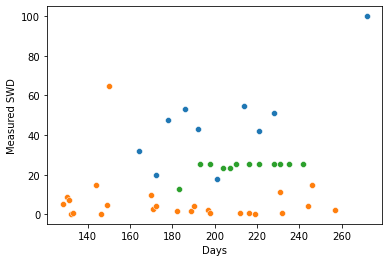

In [28]:
treatment = '1'
ax = sns.scatterplot(y = 'Measured SWD', x = 'Days', data = plotting_measured_swd[plotting_measured_swd['Treatment'] == treatment])
ax = sns.scatterplot(y = 'Rain_Tot', x = 'DOY', data = coagmet_precip)
ax = sns.scatterplot(y = treatment, x = 'DOY', data = irrigation_days[irrigation_days[treatment] > 0 ])

In [29]:
etr_yma = pd.read_csv('../Data/Etr_yuma/ETr_yuma.txt', skiprows=2)
etr_yma['Date'] = pd.to_datetime(etr_yma['Date'])
etr_yma = etr_yma[etr_yma['Date'] >= datetime.datetime(2021,1,1)].reset_index()
etr_yma['DOY'] = [(x - datetime.datetime(etr_yma['Date'][0].year, 1, 1)).days + 1 for x in etr_yma['Date']]
etr_yma_simple = pd.DataFrame(data = {'ETr LIRF (mm/d)':etr_yma['ETr']}).T
etr_yma_simple.columns = list(etr_yma['DOY'].values)
etr_yma_simple

,1,2,3,4,5,6,7,8,9,10,...,253,254,255,256,257,258,259,260,261,262
ETr LIRF (mm/d),0.03,0.04,0.05,0.05,0.08,0.07,0.05,0.04,0.02,0.02,...,0.3,0.26,0.22,0.22,0.18,0.28,0.25,0.18,0.26,0.21


In [30]:
water_df_swd_grouped_multiplied

,Treatment,Depth,164,172,178,186,192,201,214,221,228,272,FC
0,1,305,17.629658,11.539742,23.406541,27.250808,14.045782,1.368635,6.336484,0.898669,0.369210,23.438693,28.238263
1,1,610,4.693642,2.780196,3.783085,6.171060,7.486126,2.281732,11.327176,9.197873,11.079920,14.536461,32.022230
2,1,914,0.955452,0.306329,4.238225,4.034748,3.612089,4.060829,9.601742,7.556987,10.730719,17.768542,25.647154
3,1,1219,1.805510,2.393199,5.173150,5.937773,5.200954,3.856684,9.652015,8.031425,10.102401,16.013064,27.457075
4,1,1524,2.978116,1.707978,5.619821,6.276389,5.875850,3.505747,10.354375,9.082646,10.080334,15.099497,26.292166
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,9,610,0.680983,0.000000,3.172865,4.392955,8.126338,17.433605,33.452062,35.057362,38.958535,41.865452,32.561568
68,9,914,0.600786,0.381620,3.368117,4.002029,5.824531,10.791069,26.941715,31.652985,38.450515,45.140040,27.513478
69,9,1219,0.356202,0.000000,2.557300,3.246811,4.254679,6.550407,15.654594,17.451017,19.907189,29.500265,25.988597
70,9,1524,0.338610,0.352479,2.455556,2.584124,2.760328,3.716857,11.557323,14.605607,14.693243,21.068970,26.100934


In [31]:
water_df_swd_grouped_multiplied

,Treatment,Depth,164,172,178,186,192,201,214,221,228,272,FC
0,1,305,17.629658,11.539742,23.406541,27.250808,14.045782,1.368635,6.336484,0.898669,0.369210,23.438693,28.238263
1,1,610,4.693642,2.780196,3.783085,6.171060,7.486126,2.281732,11.327176,9.197873,11.079920,14.536461,32.022230
2,1,914,0.955452,0.306329,4.238225,4.034748,3.612089,4.060829,9.601742,7.556987,10.730719,17.768542,25.647154
3,1,1219,1.805510,2.393199,5.173150,5.937773,5.200954,3.856684,9.652015,8.031425,10.102401,16.013064,27.457075
4,1,1524,2.978116,1.707978,5.619821,6.276389,5.875850,3.505747,10.354375,9.082646,10.080334,15.099497,26.292166
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,9,610,0.680983,0.000000,3.172865,4.392955,8.126338,17.433605,33.452062,35.057362,38.958535,41.865452,32.561568
68,9,914,0.600786,0.381620,3.368117,4.002029,5.824531,10.791069,26.941715,31.652985,38.450515,45.140040,27.513478
69,9,1219,0.356202,0.000000,2.557300,3.246811,4.254679,6.550407,15.654594,17.451017,19.907189,29.500265,25.988597
70,9,1524,0.338610,0.352479,2.455556,2.584124,2.760328,3.716857,11.557323,14.605607,14.693243,21.068970,26.100934


In [32]:
columns = sorted(set(water_df_swd_grouped_multiplied['Depth']))
rows = treatments_dict.values()
fc_rz_treatments = pd.DataFrame(index = rows, columns = columns)
for i in rows:
    for j in columns:
        fc_rz_treatments.loc[i,j] = water_df_swd_grouped_multiplied[(water_df_swd_grouped_multiplied['Treatment'] == i) &
                                                                   (water_df_swd_grouped_multiplied['Depth'] == j)]['FC'].values[0]
fc_rz_treatments

,305,610,914,1219,1524,1829
1,28.2383,32.0222,25.6472,27.4571,26.2922,27.7443
2,26.741,30.6687,26.684,25.4354,25.629,27.9708
3,26.3153,31.7066,26.2044,25.841,25.9348,25.5649
4,26.4217,31.0102,27.6363,25.8154,27.2251,28.5487
5,25.0335,32.3242,26.4229,25.5357,25.2117,25.1294
6,26.5392,33.347,28.5629,26.5162,26.3344,28.8316
7,25.1048,30.3738,25.6735,26.6202,26.5224,27.6749
8,23.8296,31.1123,25.4124,24.9277,25.8303,27.3858
9,22.2657,32.5616,27.5135,25.9886,26.1009,27.3001
10,21.9813,31.488,25.3567,26.132,26.2296,27.0325


In [33]:
(610-305)/2

152.5

In [34]:
1524+152

1676

In [35]:
treatments = treatments_dict.values()
columns
taw_fc = 0.5
raw_taw = 0.5
fc_rz_dfs = []
for h in treatments:
    fc_rz = []
    fc_305 = fc_rz_treatments.loc[h,305]/100
    fc_457_762 = fc_rz_treatments.loc[h,610]/100
    fc_762_1066 = fc_rz_treatments.loc[h,914]/100
    fc_1066_1371 = fc_rz_treatments.loc[h,1219]/100
    fc_1371_1676 = fc_rz_treatments.loc[h,1524]/100
    for i in rzd['Root Zone Depth']:
        if i < 457:
            fc_rz.append(fc_305*305)
        elif i < 762:
            fc_rz.append(fc_305*305+(fc_457_762*(i-305)))
        elif i < 1066:
            fc_rz.append(fc_305*305+fc_457_762*305+fc_762_1066*(i-305))
        elif i < 1371:
            fc_rz.append(fc_305*305+fc_457_762*305+fc_762_1066*305 + fc_1371_1676(i-305))

    fc_rz_df = rzd.copy()
    fc_rz_df['FC RZ'] = fc_rz
    fc_rz_df['RAW RZ'] = fc_rz_df['FC RZ']*taw_fc*raw_taw
    fc_rz_df['DOY'] = fc_rz_df.index
    fc_rz_df['Treatment'] = h
    fc_rz_dfs.append(fc_rz_df)
fc_rz_dfs_all = pd.concat(fc_rz_dfs)
fc_rz_dfs_all = fc_rz_dfs_all.astype({'DOY':int})
fc_rz_dfs_all

,Root Zone Depth,FC RZ,RAW RZ,DOY,Treatment
125,80,86.126704,21.531676,125,1
126,80,86.126704,21.531676,126,1
127,80,86.126704,21.531676,127,1
128,80,86.126704,21.531676,128,1
129,80,86.126704,21.531676,129,1
...,...,...,...,...,...
301,1050,376.865861,94.216465,301,12
302,1050,376.865861,94.216465,302,12
303,1050,376.865861,94.216465,303,12
304,1050,376.865861,94.216465,304,12


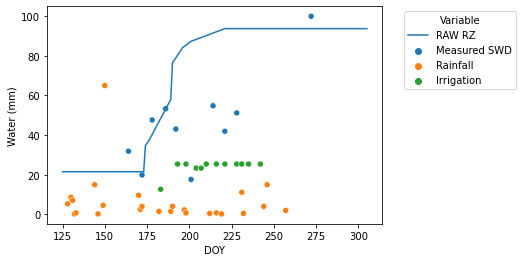

In [36]:
fig, ax = plt.subplots()
treatment = '1'

temp_df1 = plotting_measured_swd[plotting_measured_swd['Treatment'] == treatment]
temp_df1 = temp_df1[['Days','Measured SWD']]
temp_df1['Variable'] = 'Measured SWD'
temp_df1.columns = ['DOY','Water (mm)', 'Variable']
temp_df2 = coagmet_precip[['DOY', 'Rain_Tot']].copy()
temp_df2['Variable'] = 'Rainfall'
temp_df2.columns = ['DOY','Water (mm)', 'Variable']
temp_df3 = irrigation_days[irrigation_days[treatment] > 0 ][['DOY', treatment]]
temp_df3['Variable'] = 'Irrigation'
temp_df3.columns = ['DOY','Water (mm)', 'Variable']

full_trtm_df = pd.concat([temp_df1, temp_df2, temp_df3])

ax = sns.scatterplot(y = 'Water (mm)', x = 'DOY', hue = 'Variable', data = full_trtm_df, ax = ax)

raw_rz = fc_rz_dfs_all[fc_rz_dfs_all['Treatment'] == treatment]

plt.plot(raw_rz['DOY'], raw_rz['RAW RZ'], label = 'RAW RZ')
handles, labels = ax.get_legend_handles_labels()
ax.legend(labels = labels, handles=handles, title='Variable', bbox_to_anchor=(1.05, 1), loc='upper left')

In [37]:
Kcb = pd.read_csv('/mnt/c/Users/bo.stevens/OneDrive - USDA/2021/Water balance/Practice project/Water Balance Test Data/Kcb.csv', index_col=0)
Kcb.columns = pd.to_datetime(Kcb.columns)
Kcb.columns = [(x - datetime.datetime(2012, 1, 1)).days + 1 for x in Kcb.columns]
Kcb

,134,135,136,137,138,139,140,141,142,143,...,306,307,308,309,310,311,312,313,314,315
Treatment,,,,,,,,,,,,,,,,,,,,,
1,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12
2,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12
3,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12
4,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12
5,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12
6,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12
7,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12
8,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12
9,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12


In [38]:
days = list(rzd.index)
days = [int(x) for x in days]
swd_days = [num for num in water_df_swd_grouped_multiplied.columns if isinstance(num, (int,float))]
swd_filled = pd.DataFrame(columns=days)
swd_filled[['Treatment','Depth']] = water_df_swd_grouped_multiplied[['Treatment','Depth']]
swd_filled[min(days)] = 0
for day in days:
    if day == min(days):
        continue
    elif day in swd_days:
#         print('yes')
        swd_filled[day] = water_df_swd_grouped_multiplied[day]
    else:
        swd_filled[day] = swd_filled[day - 1]

In [39]:
print(min(swd_days))
print(max(swd_days))

164
272


In [40]:
def deficit(treatment, depth, day):
    return swd_filled[(swd_filled['Treatment'] == treatment) & (swd_filled['Depth'] == depth)][day].values[0]

In [41]:
deficit_at_rz_margin_dfs = []
depths = list(set(swd_filled['Depth']))
for treatment in treatments:
    deficit_at_rz_margin_list = []
    deficit_at_rz_margin = 0
    root_zone_depth_prev = 0
    swd_prev = 0
    for day in days:
    #     print(day)
        root_zone_depth = rzd.loc[day].values[0]
    #     print(root_zone_depth)
            # Not possible given the 2013 data
        if root_zone_depth <= depths[0]:
            deficit_at_rz_margin = deficit(treatment, depths[0], day)

        # Not possible given 2013 data
        elif (root_zone_depth_prev <= depths[0]) & (root_zone_depth > depths[0]):
            deficit_at_rz_margin = deficit(treatment, depths[0], day)
        # Happens at day 173
        elif (root_zone_depth_prev <= depths[0] + (depths[1] - depths[0])/2) & (root_zone_depth > depths[0] + (depths[1] - depths[0])/2):
            deficit_at_rz_margin = deficit(treatment, depths[1], day)
        # Happens at day 189
        elif (root_zone_depth_prev <= depths[1] + (depths[2] - depths[1])/2) & (root_zone_depth > depths[1] + (depths[2] - depths[1])/2):
            deficit_at_rz_margin = deficit(treatment, depths[2], day)
        else:
            deficit_at_rz_margin = deficit_at_rz_margin_prev
        deficit_at_rz_margin_list.append(deficit_at_rz_margin)
        root_zone_depth_prev = root_zone_depth
        deficit_at_rz_margin_prev = deficit_at_rz_margin
    deficit_at_rz_margin_df = pd.DataFrame({'Days': days, 'Deficit': deficit_at_rz_margin_list})
    deficit_at_rz_margin_df['Treatment'] = treatment
    deficit_at_rz_margin_dfs.append(deficit_at_rz_margin_df)
deficit_at_rz_margin_all = pd.concat(deficit_at_rz_margin_dfs)

In [42]:
# Filling in rain data with 0's, could use > 0 for plotting to skip this part
coagmet_rain_filled = pd.DataFrame(columns = ['Rain_tot','DOY'])
coagmet_rain_filled['DOY'] = days
coatmet_rain_values = []
for day in days:
    if day in coagmet_precip['DOY'].values:
        coatmet_rain_value = coagmet_precip[coagmet_precip['DOY'] == day]['Rain_Tot'].values[0]
    else:
        coatmet_rain_value = 0
    coatmet_rain_values.append(coatmet_rain_value)
coagmet_rain_filled['Rain_tot'] = coatmet_rain_values

In [43]:
ndvi = pd.read_csv('../Data/NDVI/NDVIM42021Buf2.csv', index_col=0)
doy = [pd.to_datetime(x) for x in ndvi.columns]
doy = [(x - datetime.datetime(2021, 1, 1)).days for x in doy]
ndvi.columns = doy
ndvi.head()

,195,202,209,251
Field ID,,,,
1,0.705796,0.745421,0.814882,0.756117
2,0.646746,0.709840,0.797777,0.739282
3,0.702501,0.770107,0.842404,0.817051
4,0.704468,0.800970,0.868706,0.841784
5,0.688989,0.792179,0.863945,0.802904


In [44]:
# Need actual canopy cover
canopy_cover_df = pd.read_csv('/mnt/c/Users/bo.stevens/OneDrive - USDA/2021/Water balance/Practice project/Water Balance Test Data/canopy_cover.csv', index_col=0)
for column in canopy_cover_df.columns:
    canopy_cover_df[column] = [float(x.strip('%')) for x in canopy_cover_df[column]]
canopy_cover_df.columns = pd.to_datetime(canopy_cover_df.columns)
canopy_cover_df.columns = [(x - datetime.datetime(canopy_cover_df.columns[0].year, 1, 1)).days for x in canopy_cover_df.columns]
for i in range(min(rzd.index),133):
    canopy_cover_df[i] = 0
canopy_cover_df = canopy_cover_df/100
canopy_cover_df

,133,134,135,136,137,138,139,140,141,142,...,313,314,125,126,127,128,129,130,131,132
Treatment,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='2'>

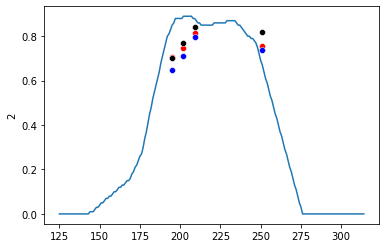

In [45]:
# Arrange and average by treatment
# emergence = 0, from senesence, line down
sns.lineplot(canopy_cover_df.columns, canopy_cover_df.iloc[1])
sns.scatterplot(y = ndvi.iloc[0], x = ndvi.columns, color = 'red')
sns.scatterplot(y = ndvi.iloc[1], x = ndvi.columns, color = 'blue')
sns.scatterplot(y = ndvi.iloc[2], x = ndvi.columns, color = 'black')

In [46]:
# Emergence = may 26, 2021
# senescence = Sept 30th
# Line connecting each point

In [47]:
from numpy import ones,vstack
from numpy.linalg import lstsq

In [48]:
def get_y(points, x):
#     points = [(1,5),(3,4)]
    x_coords, y_coords = zip(*points)
    A = vstack([x_coords,ones(len(x_coords))]).T
    m, c = lstsq(A, y_coords)[0]
    return(m*x + c)

In [49]:
def create_canopy_cover(y, x, xs):
    emergence = 146
    senescence = 273
    cover = []
    for i in xs:
        if i <= emergence:
            cover.append(0)
        elif (i > emergence) & (i <= x[0]):
            cover.append(get_y([(emergence,0),(x[0],y[0])], i))
        elif (i > x[0]) & (i <= x[1]):
            cover.append(get_y([(x[0],y[0]),(x[1],y[1])], i))
        elif (i > x[1]) & (i <= x[2]):
            cover.append(get_y([(x[1],y[1]),(x[2],y[2])], i))
        elif (i > x[2]) & (i <= x[3]):
            cover.append(get_y([(x[2],y[2]),(x[3],y[3])], i))
        elif (i > x[3]) & (i <= senescence):
            cover.append(get_y([(x[3],y[3]),(senescence,0)], i))
        elif i > senescence:
            cover.append(0)
    return(cover)

In [50]:
doys = list(range(125, 315))
canopy_cover = create_canopy_cover(ndvi.loc[1].values, doy, doys)

/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='1'>

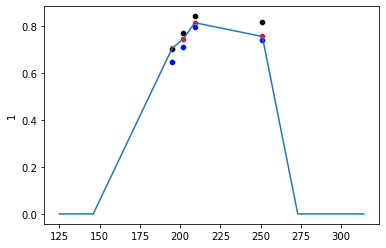

In [51]:
sns.lineplot(doys, canopy_cover)
sns.scatterplot(y = ndvi.iloc[0], x = ndvi.columns, color = 'red')
sns.scatterplot(y = ndvi.iloc[1], x = ndvi.columns, color = 'blue')
sns.scatterplot(y = ndvi.iloc[2], x = ndvi.columns, color = 'black')

In [52]:
canopy_inferred = []
for treatment in treatments:
#     print(treatment)
    canopy_inferred.append(create_canopy_cover(ndvi.loc[int(treatment)].values, doy, doys))

/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


In [53]:
canopy_cover_df = pd.DataFrame(canopy_inferred, columns=doys, index = [int(x) for x in treatments])

In [75]:
etr_yma_simple = etr_yma_simple*25.4
etr_yma_simple

,1,2,3,4,5,6,7,8,9,10,...,253,254,255,256,257,258,259,260,261,262
ETr LIRF (mm/d),0.762,1.016,1.27,1.27,2.032,1.778,1.27,1.016,0.508,0.508,...,7.62,6.604,5.588,5.588,4.572,7.112,6.35,4.572,6.604,5.334


In [76]:
etr_yma_simple.iloc[0].sum()

1296.924

In [77]:
# need intitial SWD predictions
initial_proj_swd_df = pd.read_csv('/mnt/c/Users/bo.stevens/OneDrive - USDA/2021/Water balance/Practice project/Water Balance Test Data/proj_swd_initial.csv', index_col=0)
initial_proj_swd_df

,1,2,3,4,5,6,7,8,9,10,11,12
Treatment,,,,,,,,,,,,
Proj SWD - 1050 mm,48,48,44,47,63,46,42,36,40,57,60,59
Proj SWD - RZ,6,6,6,6,6,6,6,6,6,6,6,6


In [78]:
Kcb_df_all = pd.read_csv('/mnt/c/Users/bo.stevens/OneDrive - USDA/2021/Water balance/Practice project/Water Balance Test Data/Kcb.csv', index_col=0)
Kcb_df_all.columns = pd.to_datetime(Kcb_df_all.columns)
Kcb_df_all.columns = [(x - datetime.datetime(Kcb_df_all.columns[0].year, 1, 1)).days for x in Kcb_df_all.columns]
for i in range(min(rzd.index), 133):
    Kcb_df_all[i] = 0.15
Kcb_df_all

,133,134,135,136,137,138,139,140,141,142,...,313,314,125,126,127,128,129,130,131,132
Treatment,,,,,,,,,,,,,,,,,,,,,
1,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.12,0.12,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15
2,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.12,0.12,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15
3,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.12,0.12,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15
4,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.12,0.12,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15
5,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.12,0.12,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15
6,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.12,0.12,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15
7,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.12,0.12,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15
8,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.12,0.12,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15
9,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.12,0.12,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15


In [79]:
# Root zone depth up to 1800m
# Depths of 15cm, 45cm, 75cm, 105cm, 135cm, 165cm

In [80]:
# setting days to max ETr value
days = [x for x in days if x <= max(coagmet_precip['DOY'])]
final_df_treatments = []
tew_mm = 12
residue_cover = 0.2 # This could be different for each treatment
drip_hose_offset_ratio = 0.1
for treatment in treatments:
    count = 0
    canopy_cover_all = []
    etr_lirf_all = []
    precip_all = []
    eff_precip_all = []
    irrigation_all = []
    precip_prev = 0
    y = 0
    eff_irr = 0
    eff_irr_all = []
    eff_irr_prev = 0
    max_root_zone_depth = 1050
    rzd_now = 80
    rzd_prev = 80
    etc = 0
    etc_prev = 1.1
    etc_cumulative = []
    etc_cumulative_all = []
    n = 150
    Ks_all = []
    tc_all = []
    Kcb_all = []
    Kcb_CC_all = []
    Kcb_select_all = []
    proj_swd_rz_all = []
    proj_swd_1050_all = []
    fc_rz_all = []
    rzd_tmp = []
    rzd_tmp.append(rzd_now)
    for day in days:
#         print('Day ' + str(day))
        etr_lirf_now = etr_yma_simple[day].values[0]
        etr_lirf_all.append(etr_lirf_now)
        if day == min(days):
            proj_swd_rz = initial_proj_swd_df.loc['Proj SWD - RZ', str(treatment)]
            proj_swd_rz_prev = proj_swd_rz
#             proj_swd_1050 = initial_proj_swd_df.loc['Proj SWD - 1050 mm', str(treatment)]
            proj_swd_1050 = 6
            proj_swd_1050_prev = proj_swd_1050
            Ks = 1
        fc_rz_now = fc_rz_dfs_all[(fc_rz_dfs_all['Treatment'] == treatment) & (fc_rz_dfs_all['DOY'] == day)]['FC RZ'].values[0]
        fc_rz_all.append(fc_rz_now)
#         print('FC RZ = ' + str(fc_rz_now))
#         print('proj_swd_rz_prev = ' + str(proj_swd_rz_prev))
#         print('fc_rz_now * taw_fc * raw_taw = ', str(fc_rz_now * taw_fc * raw_taw))
        if day != min(days):
            if proj_swd_rz_prev > (fc_rz_now * taw_fc * raw_taw):
                Ks = (fc_rz_now * taw_fc - proj_swd_rz_prev)/((1 - raw_taw) * fc_rz_now * taw_fc)
            else:
                Ks = 1
#         print('Ks = ' + str(Ks))
        Ks_all.append(Ks)
        canopy_cover_now = canopy_cover_df.loc[int(treatment),day]
        Kcb = Kcb_df_all.loc[int(treatment), day]
        Kcb_all.append(Kcb)
        a = 0.15
        b = 1.01
        c = 0.96
        CCf = 0.8
        canopy_cover_all.append(canopy_cover_now)
        if canopy_cover_now < CCf:
            Kcb_CC = a+b*canopy_cover_now
        else:
            Kcb_CC = c
        Kcb_CC_all.append(Kcb_CC)
        Kcb_select = Kcb_CC
        Kcb_select_all.append(Kcb_select)
        tc = etr_lirf_now * Kcb_select * Ks
        tc_all.append(tc)
    #     print('etr_lirf_now = ' + str(etr_lirf_now))
    #     print('tc = ' + str(tc))
        precip = coagmet_rain_filled[coagmet_rain_filled['DOY'] == day]['Rain_tot'].values[0]
        
        
#         if treatment == 1:
#             precip = temp_precip.loc[day]['Precip']
            
            
            
            
        precip_all.append(precip)
        if precip < tew_mm:
            x = precip
        else:
            x = tew_mm
        if precip * precip_prev > 0:
            y = max([precip_prev - eff_precip_prev - etr_yma_simple[day].values[0] + tc, 0])
        else:
            y = 0
        eff_precip = precip - x*(1-canopy_cover_now-residue_cover+residue_cover*canopy_cover_now) + y
        eff_precip_all.append(eff_precip)
        if day in irrigation_days['DOY'].values:
            count += 1
            irrigation_now = irrigation_days[irrigation_days['DOY'] == day][str(treatment)].values[0]
        else:
            irrigation_now = 0
#         #####
#         if treatment == 1:
#             irrigation_now = temp_irr.loc[day]['Actual Irrigation']
        
        
        irrigation_all.append(irrigation_now)
        if irrigation_now > 0:
            eff_irr = irrigation_now - tew_mm * (min(1 - canopy_cover_now, 
                                        max([0.1*(irrigation_now**0.5)/2 - canopy_cover_now/2 + drip_hose_offset_ratio, 0]) + 
                                        max([0.1*(irrigation_now**0.5)/2 - canopy_cover_now/2 - drip_hose_offset_ratio, 0]))*(1-residue_cover))
        else:
            eff_irr = 0
        eff_irr_all.append(eff_irr)
        if day != min(days):
            etc = etc_prev + tc + (precip - eff_precip) + (irrigation_now - eff_irr)
            if proj_swd_1050_prev + tc - eff_precip - eff_irr > 0:
                proj_swd_1050 = proj_swd_1050_prev + tc - eff_precip - eff_irr
            else:
                proj_swd_1050 = 0
            rzd_now = rzd.loc[day].values[0]
            rzd_tmp.append(rzd_now)
            if rzd_now == max_root_zone_depth:
                proj_swd_rz = proj_swd_1050
            elif proj_swd_rz_prev + tc - eff_precip - eff_irr > 0:
                if rzd_now <= 150:
                    n = 150
                else:
                    n = 300
                deficit_at_rz_margin = deficit_at_rz_margin_all[(deficit_at_rz_margin_all['Days'] == day) & 
                                                               (deficit_at_rz_margin_all['Treatment'] == treatment)]['Deficit'].values[0]
                proj_swd_rz = proj_swd_rz_prev + tc - eff_precip - eff_irr + (rzd_now - rzd_prev)*deficit_at_rz_margin/n
            else:
                proj_swd_rz = 0
        else:
            etc = tc
        etc_cumulative_all.append(etc)
#         print('proj_swd_rz_prev = ' + str(proj_swd_rz_prev))
        proj_swd_rz_all.append(proj_swd_rz)
        proj_swd_1050_all.append(proj_swd_1050)
        rzd_prev = rzd_now
        precip_prev = precip
        eff_precip_prev = eff_precip
        proj_swd_rz_prev = proj_swd_rz
        proj_swd_1050_prev = proj_swd_1050
        etc_prev = etc
    final_df_treatment = pd.DataFrame({'Root Zone Depth':rzd_tmp, 'Canopy Cover':canopy_cover_all,
                            'Kcb_table':Kcb_all, 'Kcb CC':Kcb_CC_all, 'Kcb_select':Kcb_select_all,
                            'Ks':Ks_all, 'ETr_LIRF':etr_lirf_all, 'Tc':tc_all, 'Precip':precip_all,
                            'Eff precip': eff_precip_all, 'Proj SWD 1050':proj_swd_1050_all,
                            'Proj SWD RZ': proj_swd_rz_all, 'FC RZ': fc_rz_all, 'Irrigation':irrigation_all, 
                                       'Eff irrigation':eff_irr_all, 'ET': etc_cumulative_all,
                                      'DOY':days})
    final_df_treatment['Treatment'] = treatment
    final_df_treatment['Ks_100'] = final_df_treatment['Ks']*100
    final_df_treatments.append(final_df_treatment)
final_df = pd.concat(final_df_treatments)

In [81]:
final_df_treatments[0]

,Root Zone Depth,Canopy Cover,Kcb_table,Kcb CC,Kcb_select,Ks,ETr_LIRF,Tc,Precip,Eff precip,Proj SWD 1050,Proj SWD RZ,FC RZ,Irrigation,Eff irrigation,ET,DOY,Treatment,Ks_100
0,80,0.000000,0.15,0.150000,0.150000,1.000000,5.334,0.800100,0.00,0.000000,6.000000,6.000000,86.126704,0.0,0.0,0.800100,125,1,100.000000
1,80,0.000000,0.15,0.150000,0.150000,1.000000,6.096,0.914400,0.00,0.000000,6.914400,6.914400,86.126704,0.0,0.0,1.714500,126,1,100.000000
2,80,0.000000,0.15,0.150000,0.150000,1.000000,7.620,1.143000,0.00,0.000000,8.057400,8.057400,86.126704,0.0,0.0,2.857500,127,1,100.000000
3,80,0.000000,0.15,0.150000,0.150000,1.000000,6.350,0.952500,5.33,1.066000,7.943900,7.943900,86.126704,0.0,0.0,8.074000,128,1,100.000000
4,80,0.000000,0.15,0.150000,0.150000,1.000000,4.318,0.647700,0.00,0.000000,8.591600,8.591600,86.126704,0.0,0.0,8.721700,129,1,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1050,0.687379,0.75,0.844253,0.844253,0.718465,7.620,4.622037,0.00,0.000000,124.722933,124.722933,374.865801,0.0,0.0,524.389158,253,1,71.846515
129,1050,0.653010,0.74,0.809541,0.809541,0.669146,6.604,3.577391,0.00,0.000000,128.300324,128.300324,374.865801,0.0,0.0,527.966549,254,1,66.914578
130,1050,0.618641,0.74,0.774828,0.774828,0.630973,5.588,2.731949,0.00,0.000000,131.032273,131.032273,374.865801,0.0,0.0,530.698498,255,1,63.097328
131,1050,0.584272,0.73,0.740115,0.740115,0.601822,5.588,2.488994,0.00,0.000000,133.521267,133.521267,374.865801,0.0,0.0,533.187492,256,1,60.182206


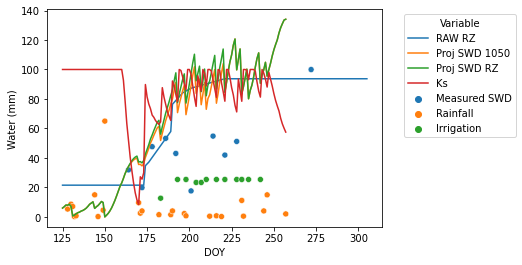

In [82]:
fig, ax = plt.subplots()
treatment = '1'

temp_df1 = plotting_measured_swd[plotting_measured_swd['Treatment'] == treatment]
temp_df1 = temp_df1[['Days','Measured SWD']]
temp_df1['Variable'] = 'Measured SWD'
temp_df1.columns = ['DOY','Water (mm)', 'Variable']
temp_df2 = coagmet_precip[['DOY', 'Rain_Tot']].copy()
temp_df2['Variable'] = 'Rainfall'
temp_df2.columns = ['DOY','Water (mm)', 'Variable']
temp_df3 = irrigation_days[irrigation_days[treatment] > 0 ][['DOY', treatment]]
temp_df3['Variable'] = 'Irrigation'
temp_df3.columns = ['DOY','Water (mm)', 'Variable']

full_trtm_df = pd.concat([temp_df1, temp_df2, temp_df3])

ax = sns.scatterplot(y = 'Water (mm)', x = 'DOY', hue = 'Variable', data = full_trtm_df, ax = ax)

raw_rz = fc_rz_dfs_all[fc_rz_dfs_all['Treatment'] == treatment]
plt.plot(raw_rz['DOY'], raw_rz['RAW RZ'], label = 'RAW RZ')

treatment_df = final_df[final_df['Treatment'] == treatment]
plt.plot(treatment_df['DOY'], treatment_df['Proj SWD 1050'], label = 'Proj SWD 1050')
plt.plot(treatment_df['DOY'], treatment_df['Proj SWD RZ'], label = 'Proj SWD RZ')
plt.plot(treatment_df['DOY'], treatment_df['Ks_100'], label = 'Ks')

handles, labels = ax.get_legend_handles_labels()
ax.legend(labels = labels, handles=handles, title='Variable', bbox_to_anchor=(1.05, 1), loc='upper left')

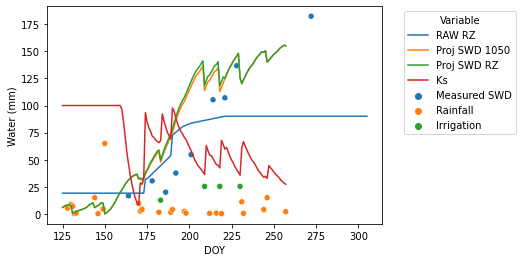

In [83]:
fig, ax = plt.subplots()
treatment = '7'

temp_df1 = plotting_measured_swd[plotting_measured_swd['Treatment'] == treatment]
temp_df1 = temp_df1[['Days','Measured SWD']]
temp_df1['Variable'] = 'Measured SWD'
temp_df1.columns = ['DOY','Water (mm)', 'Variable']
temp_df2 = coagmet_precip[['DOY', 'Rain_Tot']].copy()
temp_df2['Variable'] = 'Rainfall'
temp_df2.columns = ['DOY','Water (mm)', 'Variable']
temp_df3 = irrigation_days[irrigation_days[treatment] > 0 ][['DOY', treatment]]
temp_df3['Variable'] = 'Irrigation'
temp_df3.columns = ['DOY','Water (mm)', 'Variable']

full_trtm_df = pd.concat([temp_df1, temp_df2, temp_df3])

ax = sns.scatterplot(y = 'Water (mm)', x = 'DOY', hue = 'Variable', data = full_trtm_df, ax = ax)

raw_rz = fc_rz_dfs_all[fc_rz_dfs_all['Treatment'] == treatment]
plt.plot(raw_rz['DOY'], raw_rz['RAW RZ'], label = 'RAW RZ')

treatment_df = final_df[final_df['Treatment'] == treatment]
plt.plot(treatment_df['DOY'], treatment_df['Proj SWD 1050'], label = 'Proj SWD 1050')
plt.plot(treatment_df['DOY'], treatment_df['Proj SWD RZ'], label = 'Proj SWD RZ')
plt.plot(treatment_df['DOY'], treatment_df['Ks_100'], label = 'Ks')

handles, labels = ax.get_legend_handles_labels()
ax.legend(labels = labels, handles=handles, title='Variable', bbox_to_anchor=(1.05, 1), loc='upper left')

<AxesSubplot:xlabel='DOY', ylabel='Kcb_select'>

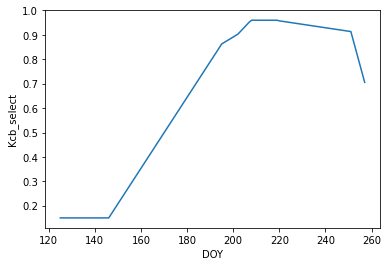

In [85]:
sns.lineplot(y = 'Kcb_select', x = 'DOY', data = final_df_treatments[0])
# should never decrease, show daily ET

In [86]:
names = list(treatments_dict.keys())
writer=pd.ExcelWriter('../Data/Water_balance/2021_water_balance.xlsx')
for i, A in enumerate(final_df_treatments):
    A.to_excel(writer,sheet_name="{0}".format(names[i]))

writer.save()